**Jade Chang**

Spring 2023

CS 251: Data Analysis and Visualization

# Lab 3a: Linear Regression

## Task 1. Mystery Data 1

### 1a) Import the data

1. Import data 'data/mystery_data_1.csv' (using your data class or [genfromtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html))
2. Print first 10 lines rows of data.

#### 1b) Using the following links and MatPlotLib documentation to view the data:
- [MatPlotLib](https://matplotlib.org/)
- [MatPlotLib hist](https://matplotlib.org/gallery/statistics/hist.html)
1. Create a figure with 3 subplots
    1. One scatterplot with column X on the x-axis and column Y on the y-axis.
    1. Two historgrams one for the X data and the other for the Y data.
    2. Create the histograms with 10 bins.
    3. Include a title for each subplot.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import data
plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams["figure.figsize"] = [12,4.5]

data = data.Data('data/mystery_data_1.csv')
headers = data.get_headers()

print("First 10 rows:")
print(data.select_data(headers,list(range(10))))

print('''
-----------------------------------
Your results should look like this:
-----------------------------------
First 10 rows:
[[ 9.185  0.536]
 [29.323 -3.209]
 [26.767  2.751]
 [17.792 -2.81 ]
 [14.624  2.409]
 [ 8.078  3.677]
 [ 3.736 -3.28 ]
 [10.999 -2.997]
 [18.113 -3.055]
 [ 3.33  -0.443]]
-----------------------------------
''')

First 10 rows:
[[ 9.185  0.536]
 [29.323 -3.209]
 [26.767  2.751]
 [17.792 -2.81 ]
 [14.624  2.409]
 [ 8.078  3.677]
 [ 3.736 -3.28 ]
 [10.999 -2.997]
 [18.113 -3.055]
 [ 3.33  -0.443]]

-----------------------------------
Your results should look like this:
-----------------------------------
First 10 rows:
[[ 9.185  0.536]
 [29.323 -3.209]
 [26.767  2.751]
 [17.792 -2.81 ]
 [14.624  2.409]
 [ 8.078  3.677]
 [ 3.736 -3.28 ]
 [10.999 -2.997]
 [18.113 -3.055]
 [ 3.33  -0.443]]
-----------------------------------



## Task 2. Analyze Mystery Data 1

### 2a) Use scipy to calculate the linear regression for Mystery Data 1 

1. Print first 10 lines rows of data.
2. Calculate the linear regression [scipy.linalg.lstsq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html)
    1. The x column is the left hand side array and the y column is the right hand side array.
    2. This includes adding homogeneous coordinates (for the intercept) to the A matrix. 
    3. Useful methods: [hstack](https://docs.scipy.org/doc/numpy/reference/generated/numpy.hstack.html), [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html) and [reshape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html)
3. Print the least-squares solution and residues
4. Using the residual, calculate and print the $R^2$ value
    1. $R^2 = 1 - \frac{residues}{smd}$
    2. The square mean deviation: $smd = \sum (y - \frac{\sum y}{n} )^2$

In [81]:
import scipy.linalg
from scipy.linalg import lstsq
data.select_data(headers,list(range(10)))
A = np.array(data.select_data("X"))
y = np.array(data.select_data("Y"))



Ahat = np.hstack((np.ones((A.shape[0],1)),A)) # reshape the 'ones' so it has the same number of dimensions
print(Ahat)

c, _, _, _ = lstsq(Ahat, y)
residues = y - Ahat@c
smd = np.sum((y- np.mean(y))**2)
R2 = 1 - np.sum(residues**2) / smd

print("c: ", np.squeeze(c))
print("residues: ",np.sum(residues**2))
print("r2: ", R2)
print('''
-----------------------------------
Your results should look like this:
----------------------------------- 
c: [ 0.92884793 -0.05650709]

residues: 3722.8001542015754

r2: 0.033824411486558126
-----------------------------------
''')

[[ 1.     9.185]
 [ 1.    29.323]
 [ 1.    26.767]
 [ 1.    17.792]
 [ 1.    14.624]
 [ 1.     8.078]
 [ 1.     3.736]
 [ 1.    10.999]
 [ 1.    18.113]
 [ 1.     3.33 ]
 [ 1.     7.269]
 [ 1.    18.756]
 [ 1.     1.163]
 [ 1.    20.432]
 [ 1.    10.113]
 [ 1.    25.021]
 [ 1.    17.094]
 [ 1.    10.92 ]
 [ 1.    29.149]
 [ 1.    18.998]
 [ 1.     4.484]
 [ 1.    20.318]
 [ 1.     0.65 ]
 [ 1.    25.113]
 [ 1.    26.606]
 [ 1.    30.873]
 [ 1.     1.612]
 [ 1.    20.943]
 [ 1.    28.132]
 [ 1.     4.32 ]
 [ 1.    13.131]
 [ 1.    28.04 ]
 [ 1.    22.031]
 [ 1.    22.369]
 [ 1.    19.957]
 [ 1.     4.229]
 [ 1.    20.611]
 [ 1.     1.589]
 [ 1.    27.273]
 [ 1.    16.983]
 [ 1.    12.637]
 [ 1.    29.329]
 [ 1.     8.886]
 [ 1.    16.516]
 [ 1.    27.577]
 [ 1.     1.606]
 [ 1.    22.6  ]
 [ 1.    26.767]
 [ 1.    12.309]
 [ 1.     2.056]
 [ 1.    18.488]
 [ 1.     7.718]
 [ 1.     1.698]
 [ 1.     2.633]
 [ 1.    21.208]
 [ 1.    13.624]
 [ 1.     7.976]
 [ 1.     7.389]
 [ 1.    30.23

### 2b) Visualize linear regression results with matplotlib

1. Plot a scatterplot of the mystery data X on the x axis and Y on the y axis
2. Plot a line representing the linear regression
    1. For line_x, use [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) to create 100 points from the min x value to the max x value
    2. For line_y, multiply line_x by the slope and add the intercept
3. Include a title (with $R^2$ value), legend, x label and y label

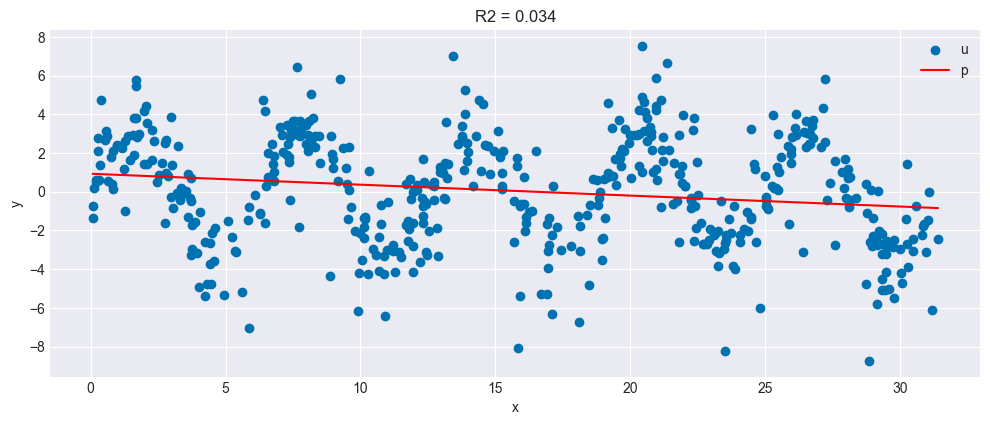

In [80]:

plt.scatter(A,y)
line_x = np.linspace(A.min(),A.max(),100)
line_y = c[0] + c[1] *line_x 

plt.plot(line_x, line_y, 'r')
plt.title( f"R2 = {R2:0.3f}")
plt.xlabel("x")
plt.ylabel("y")
plt.legend("upper right")

### 2c)  Interpret the results of the linear regression of the dataset 

Interpret the results based on your plot and $R^2$ value. Is the linear regression model a good model for the data? Why?

$R^2$ = 1 - Residual 

Residual = the distance between the point and the line 

standard mean deviation = sum of squared distance between point and line 
It is computed by taking the ratio of the sum of squared residuals over the sum of the squared difference between the dependent variable and its mean. Therefore the smaller the residual is in respect to its sum of squared difference, it means that the residual has less overall impact on the data. 

smd = np.sum((y- np.mean(y))**2)

The closer to 1 $R^2$ is, better the regression line fits the data, because it would imply that the residual is very small in respect with the sum of the squared difference between the point and the line. And since residual measures the distance between the line and the actual y value, a smaller value would mean a better fit. 

In this example, because residual is big, $R^2$ is very small. On average, the points are far away from the regression line, so the this regression model is not good for this data.  